# **Entrega 2 - Reconocimiento de patrones**

In [1]:
# Importar librerias necesarias. Si necesita mas, incluyalas aqui
import cv2 
from google.colab.patches import cv2_imshow
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
from skimage import measure 
from skimage import feature

#global function
# def function concat image
def concat_images(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])


In [2]:
from google.colab import drive #Activar el drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Ejercicio 1**
Realice la estructuración de los siguientes [archivos](https://drive.google.com/file/d/1P6GoINnF1N68RrNQ9dXAI6dUfzO1IiZD/view?usp=sharing). A continuación, cargue las imágenes y guárdelas en una lista con el nombre que ud desee. Esta lista será la base para la realización de los demás ejercicios. En esta sección, puede añadir las celdas de código que considere. 

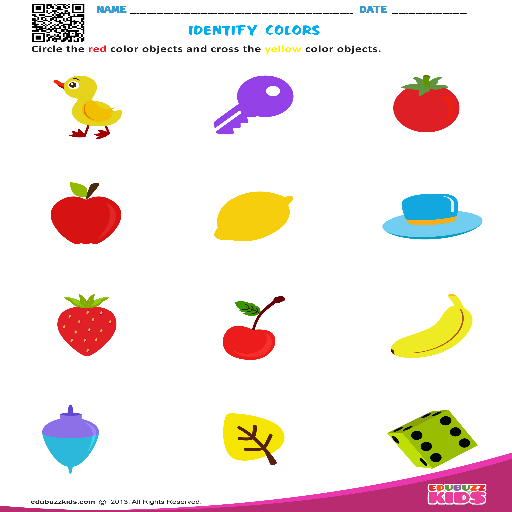

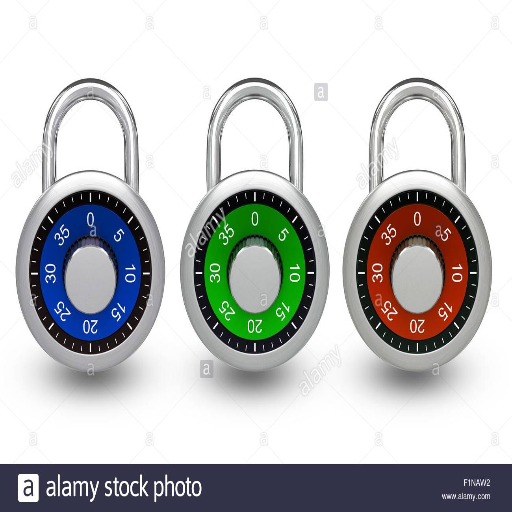

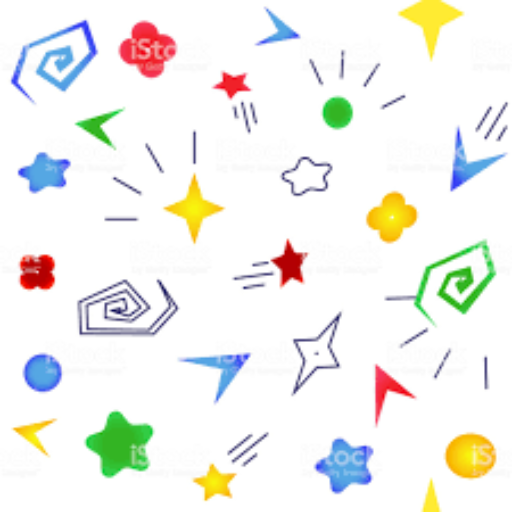

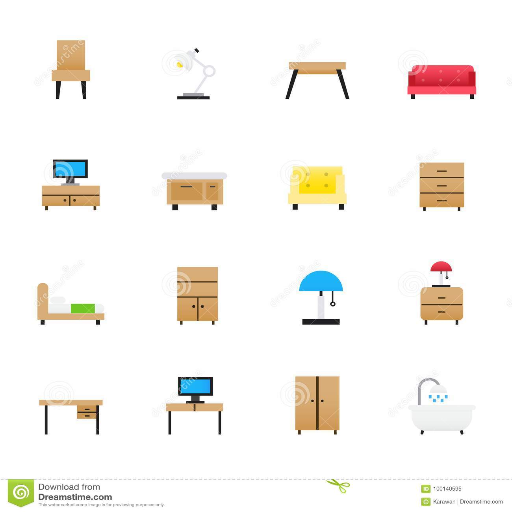

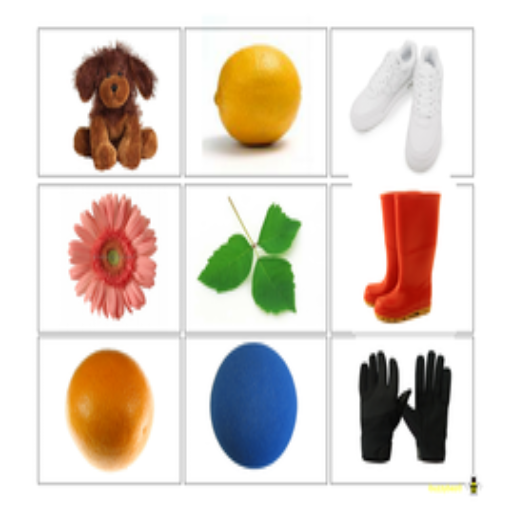

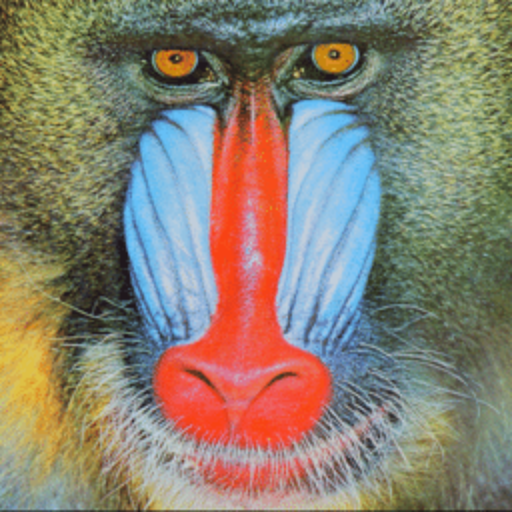

In [3]:

path = "//content/drive/MyDrive/ReconocimientoDePatrones-20222/Seguimientos/Seguimiento_2" # donde se encuentran los archivos para crear mi lista

#---- Introduzca su codigo aqui
ext_list = [".jpg",".jpeg",".png"]
list_images_files=[]


for data_file in os.listdir(path) : # para recorrer la carpeta con los archivos

  
  #para coger archivos con una extencion en especiifco
  if os.path.splitext(data_file) [1] in ext_list :
    list_images_files.append(os.path.join(path,data_file))


list_images = []


for image_file  in list_images_files :  #Lista de imagenes
   img=cv2.imread(image_file,1)
   img=cv2.resize(img,(512,512))
   list_images.append(img)
   
#---- Muestre imagen
for i in range(len(list_images)) :
   cv2_imshow(list_images[i])



## **Ejercicio 2**

Realice la segmentación de todos los objetos de color amarillo en todas las imágenes ya estructuradas. La imágen resultado debe ser similar a la mostrada [aquí](https://drive.google.com/file/d/1QKtRcSsbDHrz4NkrDlTKubLYf8FMX-GX/view?usp=sharing). En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** recuerden que es más fácil realizar segmentación por color con imágenes en HSV. Para ayudarles, les recomiendo que realicen esto a partir del histograma de una imagen y luego extrapolen a las demás. También les recomiendo que consulten sobre los valores de los rangos del color en HSV.

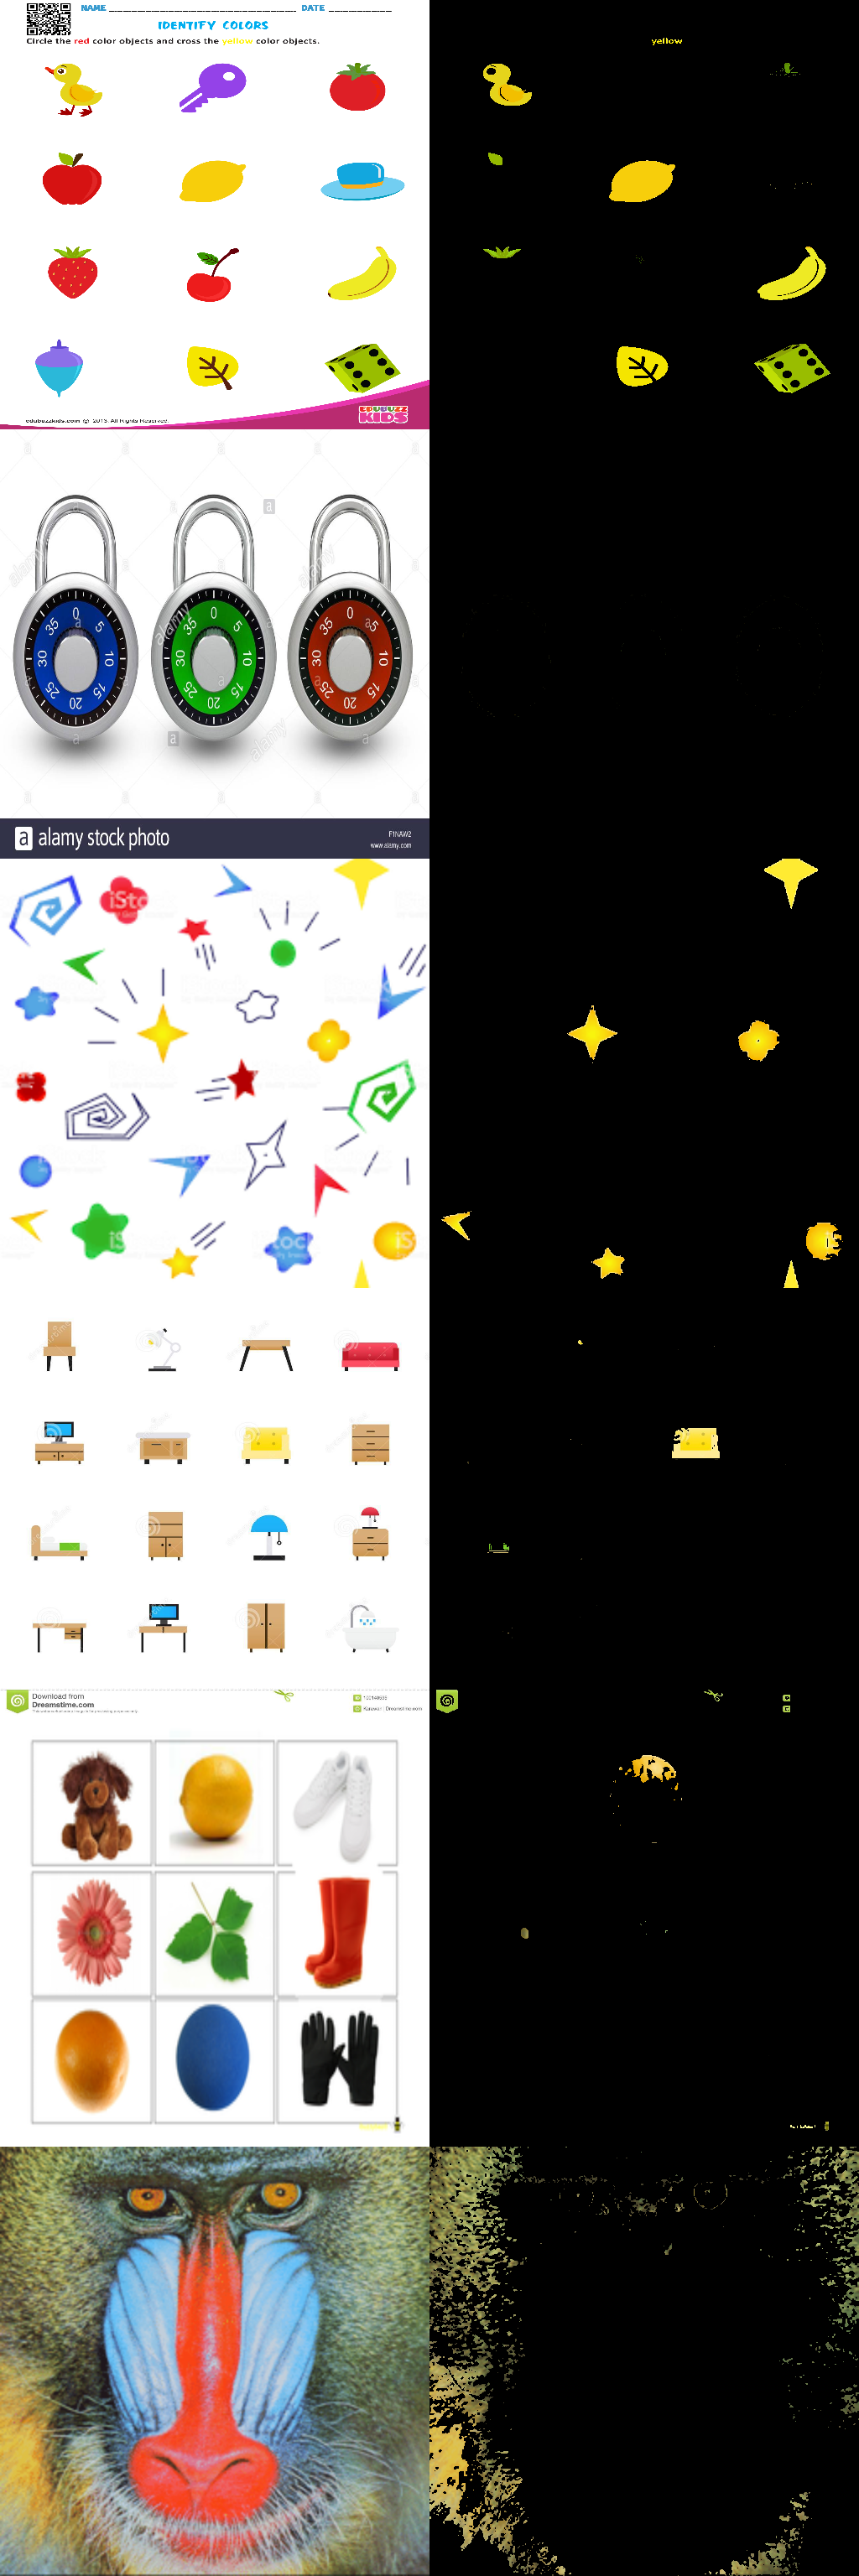

In [ ]:
# amarillo claro (0-10)
lower_yellow_L = np.array([22, 93, 0])
upper_yello_L = np.array([45, 255, 255])

array = ([])

#---- Introduzca su codigo aqui
for i in range(len(list_images)) :
  
   hsv_image = cv2.cvtColor(list_images[i], cv2.COLOR_BGR2HSV) # convertir la imagen a otro espacio de color
   
   #cv2_imshow(list_images[i])

   mask1= cv2.inRange(hsv_image, lower_yellow_L,upper_yello_L )
  
   mask=mask1
   res = cv2.bitwise_and(list_images[i], list_images[i], mask= mask)

   array.append((list_images[i],res))
   
#---- Muestre imagen  
   
imageResult = concat_images(array) 
cv2_imshow(imageResult)




  





   



## **Ejercicio 3**

Realice la segmentación de de todos los objetos en todas las imágenes ya estructuradas en escala de grises (ver la siguiente [imagen](https://drive.google.com/file/d/1qRz_iDHFv9v_6vjDsAFEFgjv6xjfGQgc/view?usp=sharing)). Realice la extracción del fondo de la imágen y deje solo los objetos, tal y como se muestran en las 2 columnas de la imagen. Las imágenes de cada columna se calculan de manera independiente. En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** Las dos imágenes pueden obtenerse usando umbralización. 

In [ ]:
#---- Introduzca su codigo aqui

image = cv2.imread(list_images_files[5], 0)
image = cv2.medianBlur(image,1)

th1 = cv2.adaptiveThreshold(image, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,2)
ret,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV)

image = cv2.resize(image, (250,250))
th1 = cv2.resize(th1, (250,250))
th2 = cv2.resize(th2, (250,250))

h_stack1 = np.hstack([image, th1, th2])
    

In [ ]:
image = cv2.imread(list_images_files[2], 0)
image = cv2.medianBlur(image,3)

th1 = cv2.adaptiveThreshold(image, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)

ret,th2 = cv2.threshold(image,210,255, cv2.THRESH_TOZERO)

image = cv2.resize(image, (250,250))
th1 = cv2.resize(th1, (250,250))
th2 = cv2.resize(th2, (250,250))

h_stack2 = np.hstack([image, th1, th2])


In [ ]:

image = cv2.imread(list_images_files[3], 0)
image = cv2.medianBlur(image,1)

th1 = cv2.adaptiveThreshold(image, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,2)

ret,th2 = cv2.threshold(image,210,255, cv2.THRESH_TOZERO)


image = cv2.resize(image, (250,250))
th1 = cv2.resize(th1, (250,250))
th2 = cv2.resize(th2, (250,250))


h_stack3 = np.hstack([image, th1, th2])


In [ ]:
image = cv2.imread(list_images_files[1], 0)
image = cv2.medianBlur(image,1)

ret,th1 = cv2.threshold(image,250,cv2.THRESH_TRUNC, cv2.THRESH_BINARY_INV)
ret,th2 = cv2.threshold(image,210,255, cv2.THRESH_TOZERO)
image = cv2.resize(image, (250,250))
th1 = cv2.resize(th1, (250,250))
th2 = cv2.resize(th2, (250,250))

h_stack4 = np.hstack([image, th1, th2])


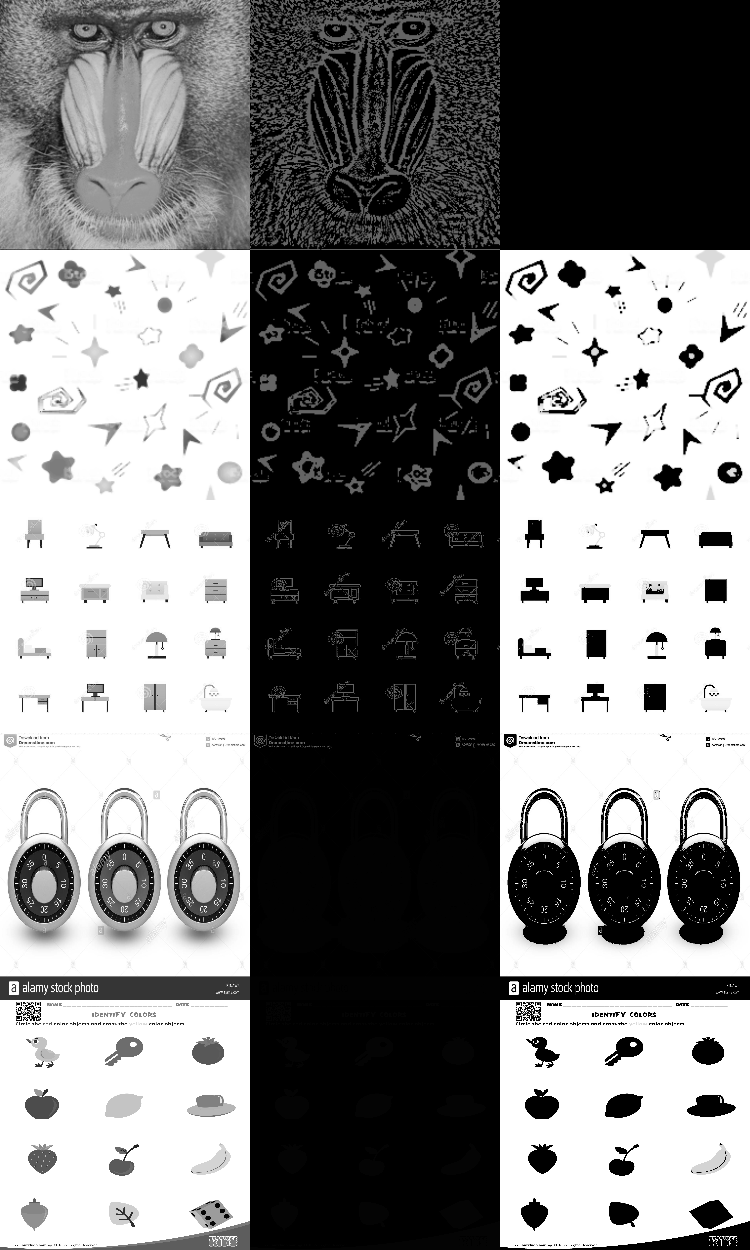

In [ ]:
image = cv2.imread(list_images_files[0], 0)
image = cv2.medianBlur(image,1)

ret,th1 = cv2.threshold(image,250,cv2.THRESH_TOZERO_INV, cv2.THRESH_BINARY_INV)
ret,th2 = cv2.threshold(image,210,255, cv2.THRESH_TOZERO)
images = [image, th1, th2]

image = cv2.resize(image, (250,250))
th1 = cv2.resize(th1, (250,250))
th2 = cv2.resize(th2, (250,250))

h_stack5 = np.hstack([image, th1, th2])

v_stack = np.vstack([h_stack1, h_stack2, h_stack3, h_stack4, h_stack5])
cv2_imshow(v_stack)



## **Ejercicio 4**

A partir de la imagen [sudoku1.jpg](https://drive.google.com/file/d/14tjOAYXvLhl38AFsVyie82MGAlXPeYH0/view?usp=sharing), extraiga el siguiente sudoku y extraiga la siguiente [perspectiva](https://drive.google.com/file/d/1IJH6-cVDJOTyoWwdJofjHKoocba5eyKJ/view?usp=sharing) \\

In [ ]:
#---- Introduzca su codigo aqui
image = cv2.imread('/content/drive/MyDrive/ReconocimientoDePatrones-20222/images/sudoku1.jpg')
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.circle(image, ( 370 , 170 ), 2, [0,0,255],2)
cv2.circle(image, ( 600 , 165 ), 2, [0,255,0],2)
cv2.circle(image, ( 360 , 385 ), 2, [255,0,0],2)
cv2.circle(image, ( 645 , 375 ), 2, [255,255,255],2)
plt.figure(figsize=(15,10))


# Confirm selected points
points = np.float32([[ 370 , 170 ],[  600 , 165 ],[ 360 , 385 ],[ 645 , 375 ]])

# Create the output image we want
output_size = (300,300)
mapping = np.float32([[0,0],[300,0],[0,300],[300,300]])




<Figure size 1080x720 with 0 Axes>

In [ ]:
Perspective = cv2.getPerspectiveTransform(points, mapping)
imagePerspective = cv2.warpPerspective(image, Perspective, output_size)

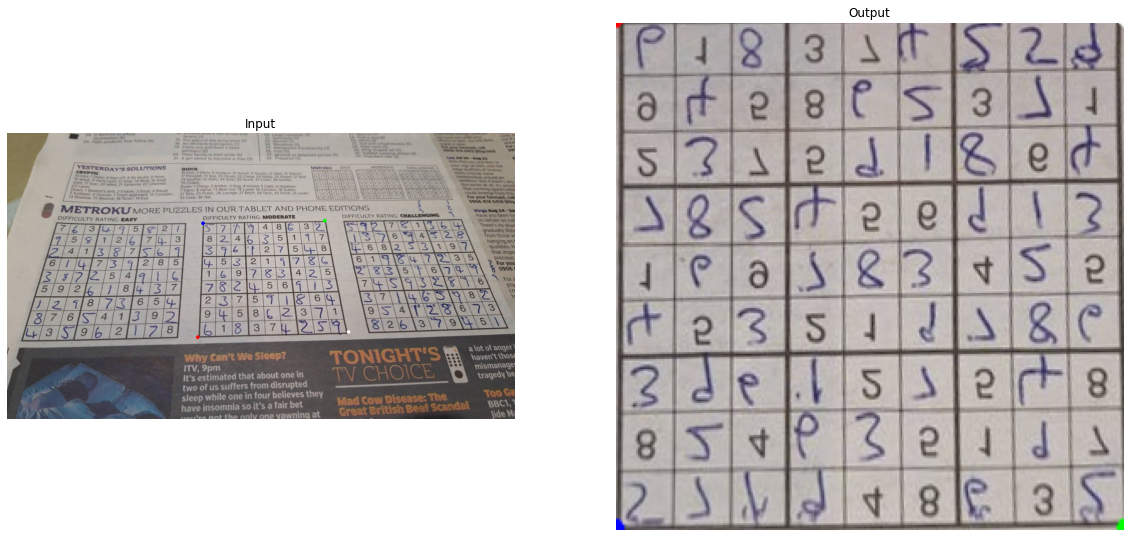

In [ ]:
_, axes = plt.subplots(1,2, figsize = (20,14))
axes[0].imshow(image); axes[0].set_title('Input'); axes[0].set_axis_off()
axes[1].imshow(cv2.flip(imagePerspective, 0)); axes[1].set_title('Output'); axes[1].set_axis_off()

#---- Muestre imagen
plt.show()